In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [38]:
import numpy as np
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [4]:
fpath = 'C:/Users/USUARIO/Downloads/Formula_1'
circuits = pd.read_csv(f'{fpath}/circuits.csv',  na_values=r'\N')
constructorResults = pd.read_csv(f'{fpath}/constructor_results.csv', na_values=r'\N')
constructors = pd.read_csv(f'{fpath}/constructors.csv', na_values=r'\N')
constructorStandings = pd.read_csv(f'{fpath}/constructor_standings.csv', na_values=r'\N')
drivers = pd.read_csv(f'{fpath}/drivers.csv',  na_values=r'\N')
driverStandings = pd.read_csv(f'{fpath}/driver_standings.csv',  na_values=r'\N')
lapTimes = pd.read_csv(f'{fpath}/lap_times.csv')
pitStops = pd.read_csv(f'{fpath}/pit_stops.csv')
qualifying = pd.read_csv(f'{fpath}/qualifying.csv', na_values=r'\N')
races = pd.read_csv(f'{fpath}/races.csv', na_values=r'\N')
results = pd.read_csv(f'{fpath}/results.csv',  na_values=r'\N')
seasons = pd.read_csv(f'{fpath}/seasons.csv',  na_values=r'\N')
status = pd.read_csv(f'{fpath}/status.csv', na_values=r'\N')

pitStops = pitStops.rename(columns={'time':'pitTime'})
pitStops['seconds'] = pitStops['milliseconds'].apply(lambda x: x/1000) #porque la columna 'duration' está como un string 

In [5]:
pitStops.rename(columns={'milliseconds': 'miliseconds_pit', 'seconds': 'seconds_pit'}, inplace=True)


In [6]:
pitStops

,raceId,driverId,stop,lap,pitTime,duration,miliseconds_pit,Unnamed: 7,Unnamed: 8,seconds_pit
0,841,153,1,1,17:05:23,26.898,26898,NaN,NaN,26.898
1,841,30,1,1,17:05:52,25.021,25021,NaN,NaN,25.021
2,841,17,1,11,17:20:48,23.426,23426,NaN,1.759738,23.426
3,841,4,1,12,17:22:34,23.251,23251,NaN,NaN,23.251
4,841,13,1,13,17:24:10,23.842,23842,NaN,NaN,23.842
...,...,...,...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798,NaN,NaN,23.798
10085,1110,830,2,30,16:00:16,23.012,23012,NaN,NaN,23.012
10086,1110,848,3,33,16:07:06,23.529,23529,NaN,NaN,23.529
10087,1110,858,3,34,16:09:09,23.109,23109,NaN,NaN,23.109


In [7]:
pitStops['duration'].max()

'59.555'

In [8]:
pitStops[pitStops['duration'] == '16:44.7']

,raceId,driverId,stop,lap,pitTime,duration,miliseconds_pit,Unnamed: 7,Unnamed: 8,seconds_pit
751,853,817,1,1,14:08:50,16:44.7,1004718,NaN,NaN,1004.718


In [9]:
pitStops['miliseconds_pit'].max()

3069017

In [10]:
pitStops=pitStops[pitStops['seconds_pit'] <=50 ]

In [11]:
pitStops['seconds_pit'].max()

49.849

In [12]:
df = pd.merge(results,races[['raceId','year','name','round']],on = 'raceId',how = 'left')
df = pd.merge(df,drivers[['driverId','driverRef','nationality']],on = 'driverId',how ='left')
df = pd.merge(df,constructors[['constructorId','name','nationality']],on ='constructorId',how ='left')

In [13]:
df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId'],axis =1,inplace = True)

In [14]:
df.rename(columns = {'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality',
                    'name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace = True)

In [15]:
merged_df = df.merge(pitStops, on=['raceId', 'driverId'])


In [16]:
merged_df = merged_df[(merged_df['year'] != 2019) & (merged_df['year'] > 2010)]

In [17]:
merged_df

,raceId,driverId,constructorId,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,...,constructor_name,constructor_nationality,stop,lap,pitTime,duration,miliseconds_pit,Unnamed: 7,Unnamed: 8,seconds_pit
0,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Red Bull,Austrian,1,14,17:25:17,22.603,22603,NaN,21.0,22.603
1,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Red Bull,Austrian,2,36,17:59:17,24.036,24036,NaN,NaN,24.036
2,841,1,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,...,McLaren,British,1,16,17:28:24,23.227,23227,NaN,NaN,23.227
3,841,1,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,...,McLaren,British,2,36,17:59:29,23.199,23199,NaN,NaN,23.199
4,841,808,4,6,3,15.0,+30.560,5400819.0,7.0,1:30.064,...,Renault,French,1,16,17:28:39,24.535,24535,NaN,1364.0,24.535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9648,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,...,Williams,British,2,24,15:50:09,23.938,23938,NaN,NaN,23.938
9649,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,...,Williams,British,3,34,16:09:09,23.109,23109,NaN,NaN,23.109
9650,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,...,Haas F1 Team,American,1,12,15:26:56,24.571,24571,NaN,NaN,24.571
9651,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,...,Haas F1 Team,American,2,24,15:50:04,25.238,25238,NaN,NaN,25.238


In [18]:
merged_df.columns

Index(['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder',
       'points', 'time', 'milliseconds', 'fastest_lap_rank', 'fastestLapTime',
       'fastestLapSpeed', 'year', 'gp_name', 'round', 'driver',
       'driver_nationality', 'constructor_name', 'constructor_nationality',
       'stop', 'lap', 'pitTime', 'duration', 'miliseconds_pit', 'Unnamed: 7',
       'Unnamed: 8', 'seconds_pit'],
      dtype='object')

In [19]:
# Calcular el promedio de 'seconds_pit' por cada  grupo
mean_seconds_pit = merged_df.groupby(['raceId', 'driverId'])['seconds_pit'].transform('mean')

#agrgar esta columna al data frame
merged_df['mean_seconds_pit'] = mean_seconds_pit

In [20]:
mean_seconds_pit

0       23.3195
1       23.3195
2       23.2130
3       23.2130
4       25.1090
         ...   
9648    23.5390
9649    23.5390
9650    24.9045
9651    24.9045
9652    23.3030
Name: seconds_pit, Length: 9006, dtype: float64

In [21]:
mean_seconds_pit.shape

(9006,)

In [22]:
merged_df

,raceId,driverId,constructorId,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,...,constructor_nationality,stop,lap,pitTime,duration,miliseconds_pit,Unnamed: 7,Unnamed: 8,seconds_pit,mean_seconds_pit
0,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Austrian,1,14,17:25:17,22.603,22603,NaN,21.0,22.603,23.3195
1,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Austrian,2,36,17:59:17,24.036,24036,NaN,NaN,24.036,23.3195
2,841,1,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,...,British,1,16,17:28:24,23.227,23227,NaN,NaN,23.227,23.2130
3,841,1,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,...,British,2,36,17:59:29,23.199,23199,NaN,NaN,23.199,23.2130
4,841,808,4,6,3,15.0,+30.560,5400819.0,7.0,1:30.064,...,French,1,16,17:28:39,24.535,24535,NaN,1364.0,24.535,25.1090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9648,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,...,British,2,24,15:50:09,23.938,23938,NaN,NaN,23.938,23.5390
9649,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,...,British,3,34,16:09:09,23.109,23109,NaN,NaN,23.109,23.5390
9650,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,...,American,1,12,15:26:56,24.571,24571,NaN,NaN,24.571,24.9045
9651,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,...,American,2,24,15:50:04,25.238,25238,NaN,NaN,25.238,24.9045


In [23]:
merged_df.sort_values('positionOrder',ascending=True)

,raceId,driverId,constructorId,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,...,constructor_nationality,stop,lap,pitTime,duration,miliseconds_pit,Unnamed: 7,Unnamed: 8,seconds_pit,mean_seconds_pit
0,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Austrian,1,14,17:25:17,22.603,22603,NaN,21.0,22.603,23.319500
8002,1057,815,9,6,1,25.0,2:13:36.410,8016410.0,2.0,1:44.687,...,Austrian,2,47,17:33:39,15.277,15277,NaN,NaN,15.277,18.575500
8001,1057,815,9,6,1,25.0,2:13:36.410,8016410.0,2.0,1:44.687,...,Austrian,1,13,16:27:25,21.874,21874,NaN,NaN,21.874,18.575500
7983,1056,830,9,2,1,25.0,1:38:56.820,5936820.0,6.0,1:14.649,...,Austrian,1,34,15:46:10,23.746,23746,NaN,NaN,23.746,23.746000
1694,871,18,1,1,1,25.0,1:29:08.530,5348530.0,10.0,1:54.293,...,British,1,20,14:46:43,19.668,19668,NaN,NaN,19.668,19.668000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,876,815,15,8,24,0.0,NaN,NaN,23.0,1:32.208,...,Swiss,1,14,15:25:19,21.336,21336,NaN,NaN,21.336,22.922000
913,855,67,5,15,24,0.0,NaN,NaN,23.0,1:42.107,...,Italian,1,11,15:22:41,21.849,21849,NaN,NaN,21.849,21.849000
1282,862,30,131,2,24,0.0,NaN,NaN,24.0,1:44.109,...,German,1,12,15:24:39,21.746,21746,NaN,NaN,21.746,21.746000
1634,869,1,1,7,24,0.0,NaN,NaN,19.0,1:20.091,...,British,2,31,14:46:44,17.598,17598,NaN,NaN,17.598,19.162333


In [24]:
merged_df.groupby(['raceId', 'driverId'])

In [25]:
merged_df

,raceId,driverId,constructorId,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,...,constructor_nationality,stop,lap,pitTime,duration,miliseconds_pit,Unnamed: 7,Unnamed: 8,seconds_pit,mean_seconds_pit
0,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Austrian,1,14,17:25:17,22.603,22603,NaN,21.0,22.603,23.3195
1,841,20,9,1,1,25.0,1:29:30.259,5370259.0,4.0,1:29.844,...,Austrian,2,36,17:59:17,24.036,24036,NaN,NaN,24.036,23.3195
2,841,1,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,...,British,1,16,17:28:24,23.227,23227,NaN,NaN,23.227,23.2130
3,841,1,1,2,2,18.0,+22.297,5392556.0,8.0,1:30.314,...,British,2,36,17:59:29,23.199,23199,NaN,NaN,23.199,23.2130
4,841,808,4,6,3,15.0,+30.560,5400819.0,7.0,1:30.064,...,French,1,16,17:28:39,24.535,24535,NaN,1364.0,24.535,25.1090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9648,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,...,British,2,24,15:50:09,23.938,23938,NaN,NaN,23.938,23.5390
9649,1110,858,3,18,17,0.0,+1:44.476,5054926.0,9.0,1:50.486,...,British,3,34,16:09:09,23.109,23109,NaN,NaN,23.109,23.5390
9650,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,...,American,1,12,15:26:56,24.571,24571,NaN,NaN,24.571,24.9045
9651,1110,807,210,0,18,0.0,+1:50.450,5060900.0,4.0,1:49.907,...,American,2,24,15:50:04,25.238,25238,NaN,NaN,25.238,24.9045


In [26]:
merged_df.columns

Index(['raceId', 'driverId', 'constructorId', 'grid', 'positionOrder',
       'points', 'time', 'milliseconds', 'fastest_lap_rank', 'fastestLapTime',
       'fastestLapSpeed', 'year', 'gp_name', 'round', 'driver',
       'driver_nationality', 'constructor_name', 'constructor_nationality',
       'stop', 'lap', 'pitTime', 'duration', 'miliseconds_pit', 'Unnamed: 7',
       'Unnamed: 8', 'seconds_pit', 'mean_seconds_pit'],
      dtype='object')

In [27]:
pingo=merged_df.groupby(['raceId', 'driverId'])['seconds_pit'].mean().reset_index()
pingo

,raceId,driverId,seconds_pit
0,841,1,23.213000
1,841,2,24.046000
2,841,3,23.716000
3,841,4,24.055000
4,841,5,24.865000
...,...,...,...
4485,1110,847,23.837000
4486,1110,848,24.046667
4487,1110,852,22.673500
4488,1110,855,24.247000


In [28]:
pingo=pingo.merge(df, on=['raceId', 'driverId'])

In [29]:
pingo.sort_values('positionOrder')

,raceId,driverId,seconds_pit,constructorId,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,year,gp_name,round,driver,driver_nationality,constructor_name,constructor_nationality
655,870,1,19.747500,1,1,1,25.0,1:41:05.503,6065503.0,4.0,1:25.677,184.082,2012,Hungarian Grand Prix,11,hamilton,British,McLaren,British
472,862,3,20.879000,131,1,1,25.0,1:36:26.929,5786929.0,8.0,1:40.967,194.356,2012,Chinese Grand Prix,3,rosberg,German,Mercedes,German
3377,1043,1,30.653500,131,2,1,26.0,1:28:32.430,5312430.0,1.0,1:15.484,234.121,2020,Emilia Romagna Grand Prix,13,hamilton,British,Mercedes,German
1779,933,3,21.768000,131,2,1,25.0,1:30:16.930,5416930.0,1.0,1:11.235,218.622,2015,Austrian Grand Prix,8,rosberg,German,Mercedes,German
1795,934,1,28.698000,131,1,1,25.0,1:31:27.729,5487729.0,1.0,1:37.093,218.425,2015,British Grand Prix,9,hamilton,British,Mercedes,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,851,15,23.118000,205,19,24,0.0,NaN,NaN,24.0,1:35.252,165.577,2011,Hungarian Grand Prix,11,trulli,Italian,Lotus,Malaysian
175,848,39,26.254667,164,24,24,0.0,NaN,NaN,24.0,1:47.708,181.123,2011,European Grand Prix,8,karthikeyan,Indian,HRT,Spanish
809,876,815,22.922000,15,8,24,0.0,NaN,NaN,23.0,1:32.208,200.091,2012,Indian Grand Prix,17,perez,Mexican,Sauber,Swiss
722,873,1,29.124000,1,1,24,0.0,NaN,NaN,19.0,1:55.541,158.063,2012,Singapore Grand Prix,14,hamilton,British,McLaren,British


In [30]:
pingo['seconds_pit'].max()

48.938

In [31]:
minga=pingo.groupby('positionOrder')['seconds_pit'].mean().reset_index()



In [32]:
minga

,positionOrder,seconds_pit
0,1,23.464183
1,2,23.731828
2,3,23.916496
3,4,23.860413
4,5,23.930622
5,6,24.092230
6,7,24.114841
7,8,24.070581
8,9,24.336845
9,10,24.388799


In [34]:
minga.to_csv('average_time_by_position.csv', index=False)

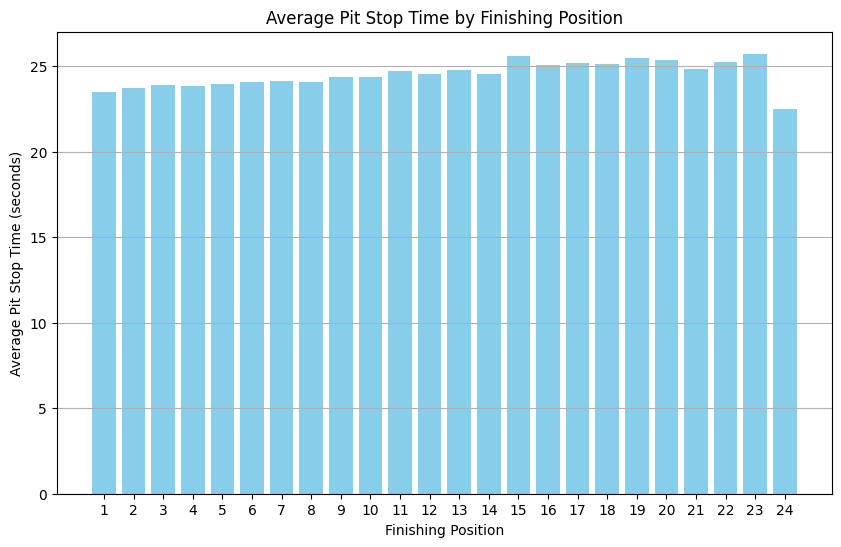

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(minga['positionOrder'], minga['seconds_pit'], color='skyblue')
plt.xlabel('Finishing Position')
plt.ylabel('Average Pit Stop Time (seconds)')
plt.title('Average Pit Stop Time by Finishing Position')
plt.xticks(minga['positionOrder'])
plt.grid(axis='y')
plt.show()

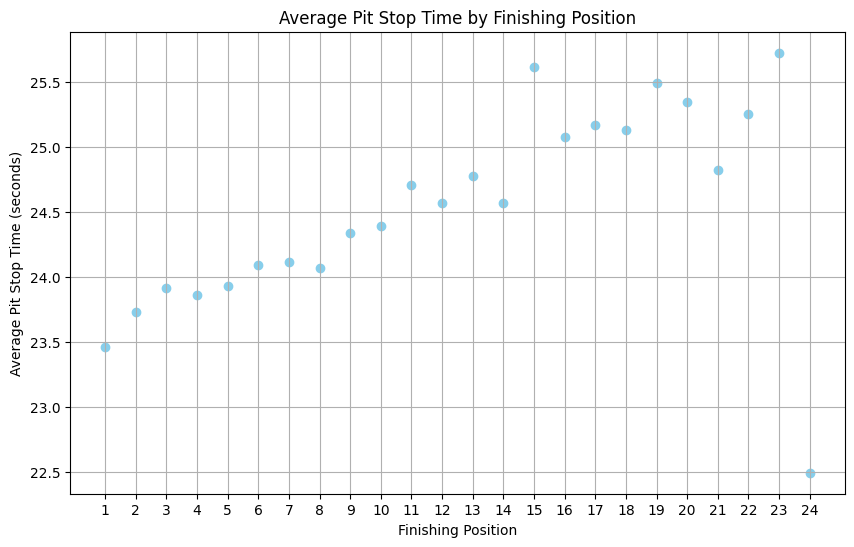

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(minga['positionOrder'], minga['seconds_pit'], color='skyblue')
plt.xlabel('Finishing Position')
plt.ylabel('Average Pit Stop Time (seconds)')
plt.title('Average Pit Stop Time by Finishing Position')
plt.xticks(minga['positionOrder'])
plt.grid()
plt.show()

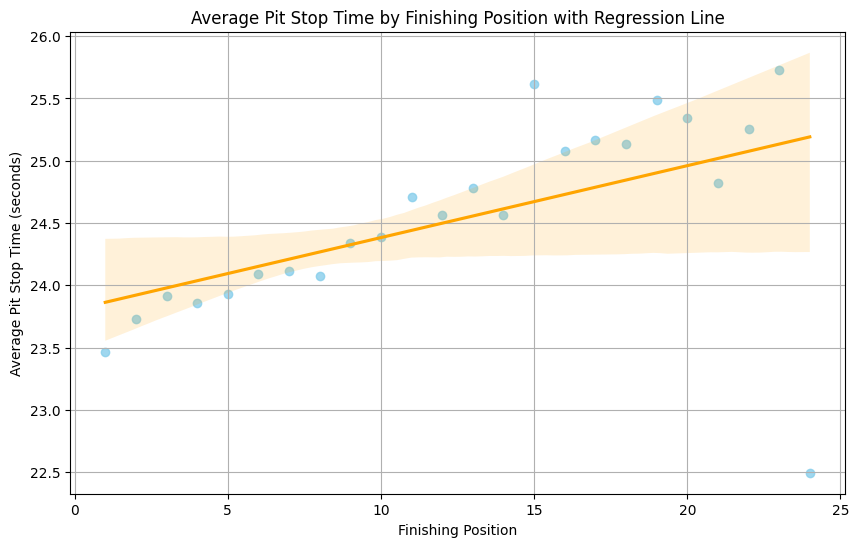

In [41]:
plt.figure(figsize=(10, 6))
sb.regplot(x='positionOrder', y='seconds_pit', data=minga, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'orange'})
plt.xlabel('Finishing Position')
plt.ylabel('Average Pit Stop Time (seconds)')
plt.title('Average Pit Stop Time by Finishing Position with Regression Line')
plt.grid()
plt.show()

In [42]:
import numpy as np

# modelo de regresión lineal
slope, intercept = np.polyfit(minga['positionOrder'], minga['seconds_pit'], 1)

# el valor de la gradiente
print(f"The slope of the regression line is: {slope}")


The slope of the regression line is: 0.05776373416093911


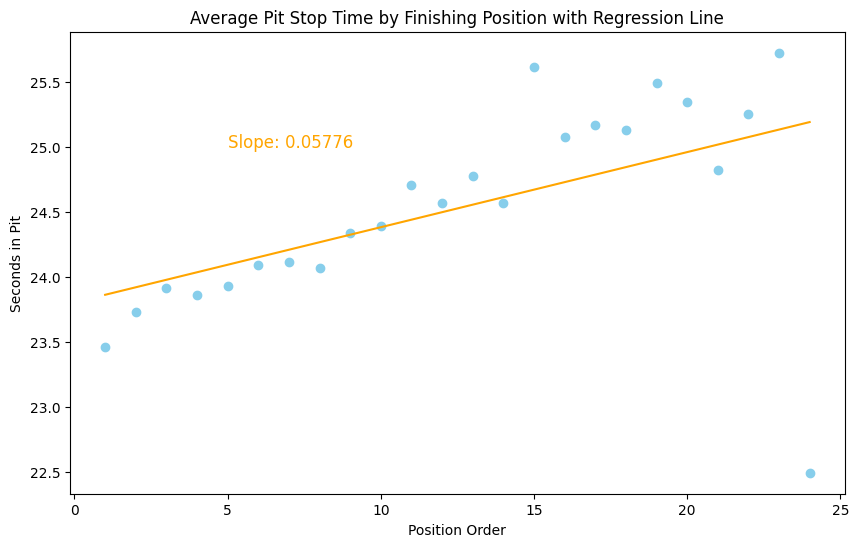

In [51]:
slope, intercept = np.polyfit(minga['positionOrder'], minga['seconds_pit'], 1)
plt.figure(figsize=(10, 6))
# 'Plotear' la información
plt.scatter(minga['positionOrder'], minga['seconds_pit'], color='skyblue') 

# Plotear la línea de regresión
x = np.array(minga['positionOrder'])
y = slope * x + intercept
plt.plot(x, y, color='orange')  

# Anotar el valor de la LR
plt.text(5, 25, f'Slope: {slope:.5f}', fontsize=12, color='orange')  


plt.xlabel('Position Order')
plt.ylabel('Seconds in Pit')
plt.title('Average Pit Stop Time by Finishing Position with Regression Line')

plt.show()